In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/AnalysisTreesInformation/AnaTreesPackage/notebooks/')
from notebooks_tools import * 
%matplotlib inline

In [2]:
columns=['run','subrun','event','startx','starty','startz','endx','endy','endz','theta','phi','length','distlenratio']

In [13]:
MCC8extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC8_extBNB_AnalysisTrees_anatreefiles_0_to_1000.csv')

In [177]:
# MCC8extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC8_extBNB_AnalysisTrees_cosmic.csv',usecols=columns)
# print 'read MCC 8 extBNB'
# MCC7extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC7_extBNB_AnalysisTrees_cosmic.csv',usecols=columns)
# print 'read MCC 7 extBNB'
MCC8cmc = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC8_openCOSMIC_MC_AnalysisTrees.csv',usecols=columns)
print 'read MCC8 CMC'

read MCC8 CMC


In [21]:
MCC8extBNBevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/events_features_MCC8_extBNB_AnalysisTrees.csv')
MCC7extBNBevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/events_features_MCC7_extBNB_AnalysisTrees.csv')
MCC8cmcevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/events_features_MCC8_openCOSMIC_MC_AnalysisTrees.csv')

In [107]:
full_features_datasets = [MCC8extBNB,MCC7extBNB,MCC8cmc]
evnts_features_datasets = [MCC8extBNBevents,MCC7extBNBevents,MCC8cmcevents]
dataset_names = ['MCC8 extBNB' , 'MCC7 extBNB' , 'MCC8 CMC']
linestyles = ['-' ,'--' , '-']
colors = ['red','red','black']

# MCC-8 extBNB plots

In [5]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

def add_retreat_label(xtext=None,ytext=None):
    label = 'cohen.erez7@gmail.com, mini-retreat (Feb-2017)'
    if xtext is not None and ytext is not None:
        plt.text(xtext,ytext,label)
    else:
        plt.figtext(0.1,0.05,label)

In [6]:
def plot_histstep(x,bins=None,color=None,label=None,linestyle='-',normed=1):
    h,bins,_ = plt.hist( x , bins=bins, histtype='step', linewidth=0 ,normed=normed)
    mid = 0.5*(bins[1:] + bins[:-1])+0.5*(bins[1] - bins[0])
    plt.plot( mid , h , linestyle=linestyle, drawstyle='steps' , color=color, linewidth=3 , label=label )
    return h,bins,mid

In [7]:
def plot_2d_histogram(data=MCC8extBNB , data_name = 'MCC8-extBNB, contained pandoraCosmic tracks',
                      varx='startx' , vary='starty' , mul_x=1, mul_y=1,
                      x_label = '$x_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                      cmap='hot_r',norm='normal',
                      binsx=50, binsy=50,  figsize=(16,10) , ticks_color='black', fontsize=25,
                      do_add_retreat_label=True,do_save_fig=True,do_add_title=True,ax=None):
    
    
    plot2d = plot_2d_hist( mul_x*data[varx].astype(float) , mul_y*data[vary].astype(float) , 
                 bins=(binsx,binsy) , cmap=cmap,
                 xlabel=x_label , ylabel=y_label, norm=norm,
                 figsize=figsize , fontsize=fontsize , ticks_color=ticks_color , ax=ax);
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=fontsize,labelcolor=ticks_color)

    counts, xedges, yedges, Image, ax = plot2d 
    if do_add_title:
        ax.set_title(data_name,fontsize=25,y=1.02)


    if do_add_retreat_label: 
        add_retreat_label()
    if do_save_fig:
        plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_%s_vs_%s.png'%(namestr(data, globals()),varx,vary))

producing Ntracks_pandoraNu plot
producing Ntracks_pandoraNu_Contained plot
producing Ncosmictracks_pandoraCosmic plot
producing Ncosmictracks_pandoraCosmic_Contained plot
producing nvtx_pandoraCosmic plot
producing Ntracks_kalmanhit plot


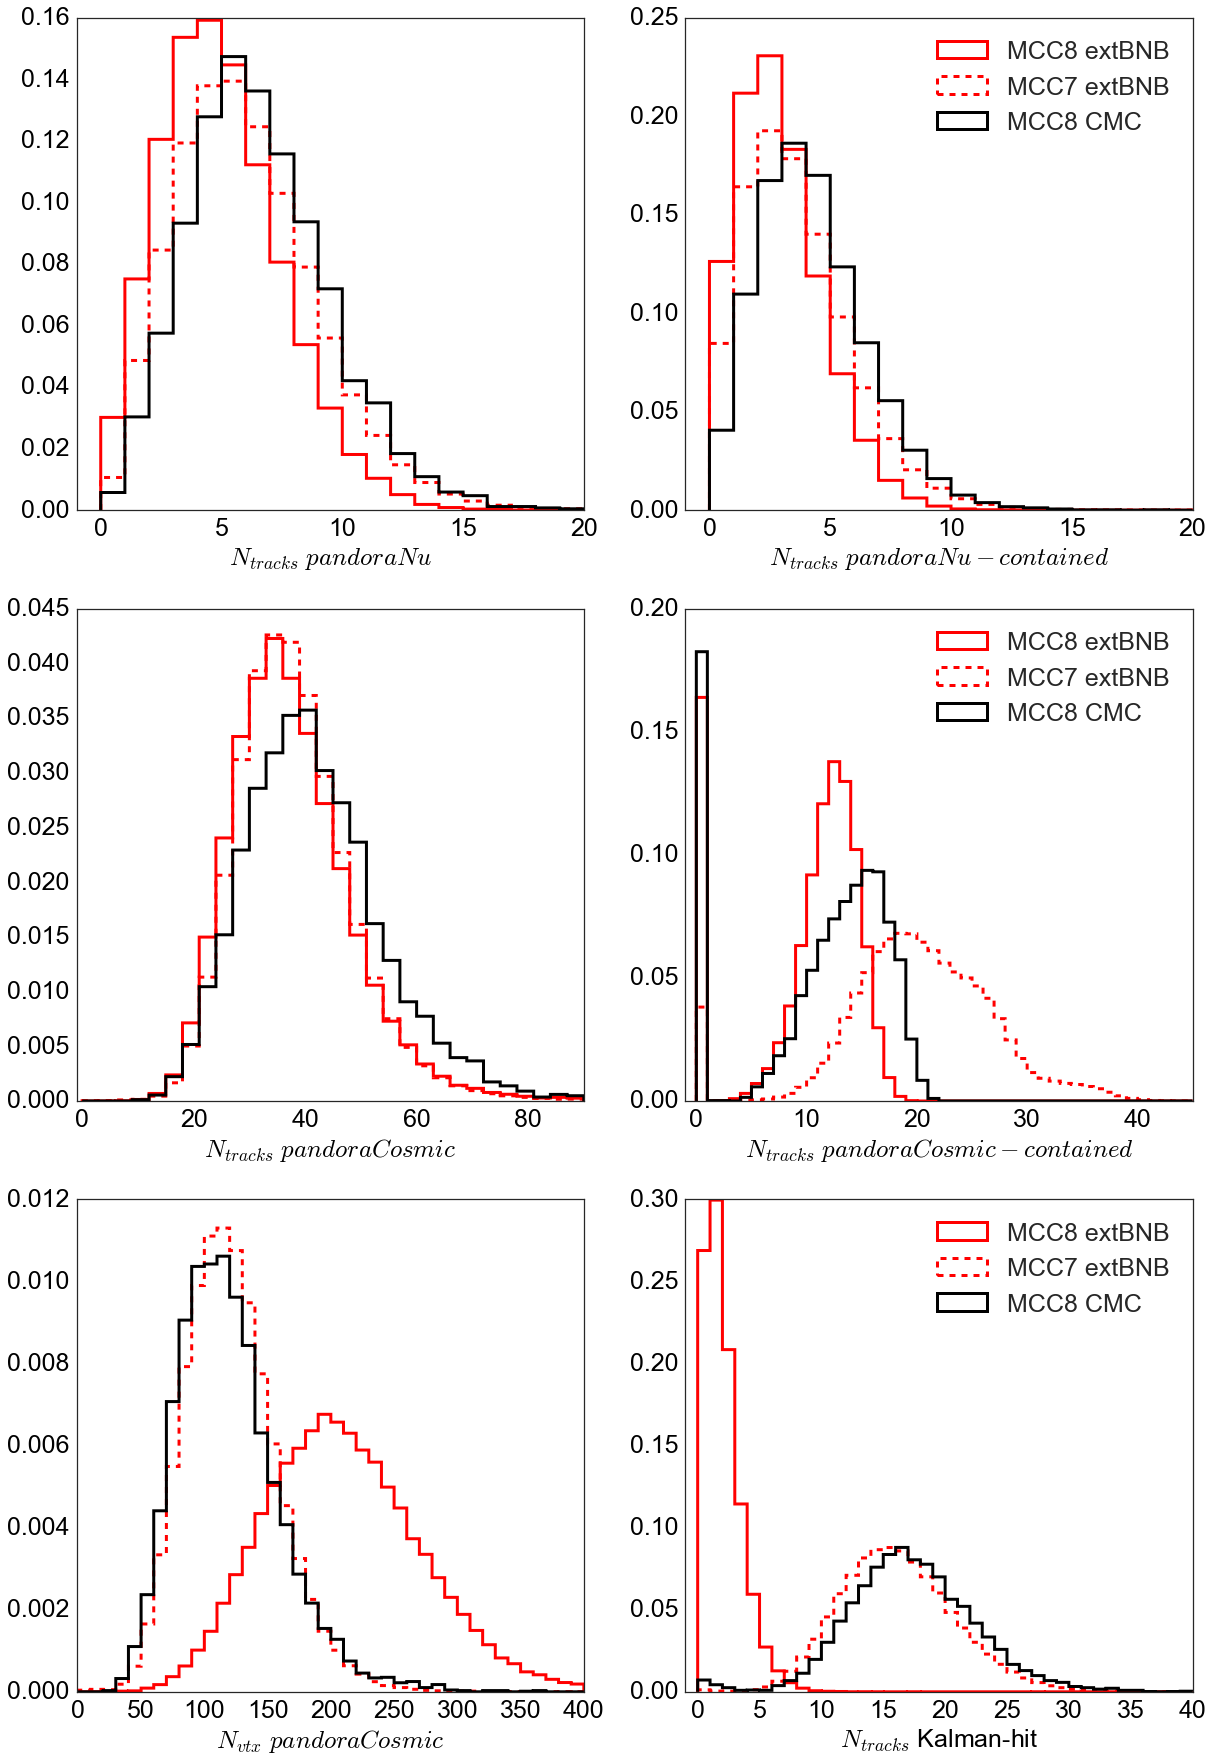

In [106]:
variables = ['Ntracks_pandoraNu','Ntracks_pandoraNu_Contained','Ncosmictracks_pandoraCosmic','Ncosmictracks_pandoraCosmic_Contained' , 'nvtx_pandoraCosmic' , 'Ntracks_kalmanhit']
var_names = ['$N_{tracks}$ $pandoraNu$' , '$N_{tracks}$ $pandoraNu-contained$' , '$N_{tracks}$ $pandoraCosmic$', '$N_{tracks}$ $pandoraCosmic-contained$' , '$N_{vtx}$ $pandoraCosmic$', '$N_{tracks}$ Kalman-hit']
Ntrackmax = [20 , 20 , 90 , 45 , 400 , 40]
nbins = [21 , 21 , 31 , 46 , 41 , 41]
fig=plt.figure(figsize=(20,30))

for i_type,var,var_name in zip(range(len(variables)),variables,var_names):
    print 'producing ' + var + ' plot' 
    xmax = Ntrackmax[i_type]
    ax=fig.add_subplot(3,2,i_type+1)
    bins=np.linspace(0,xmax,nbins[i_type])
    for evnts,c,ls,name in zip(evnts_features_datasets,colors,linestyles,dataset_names):
        h,bins,_ = plt.hist( evnts[var] , bins=bins, histtype='step' , color=c , linewidth=3 , linestyle=ls, normed=1 , label=name)
    set_axes(ax,x_label = var_name, y_label='',fontsize=25)    
    if i_type%2==1: ax.legend(loc='best',fontsize=25)
    ax.set_xlim(-1,xmax)

plt.subplots_adjust(hspace=0.2)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/Ntracks.pdf')

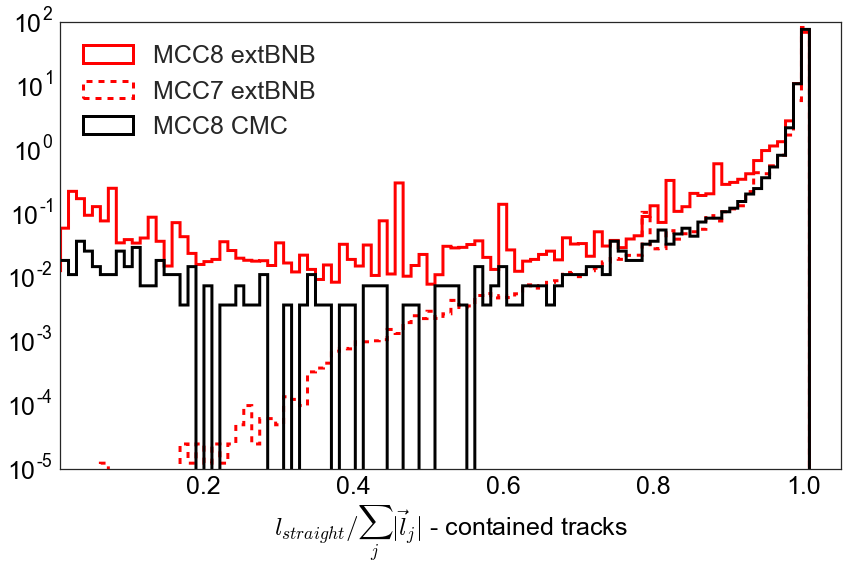

In [111]:
bins=np.linspace(0.0,1.05,100)
fig,ax=plt.subplots(figsize=(14,8))
for full_features,c,ls,name in zip(full_features_datasets,colors,linestyles,dataset_names):
    h,bins,_ = plt.hist( full_features[full_features.distlenratio>-1]['distlenratio'].astype(float) , bins=bins, histtype='step' , color=c , linewidth=3 , linestyle=ls, normed=1 , label=name)

set_axes(ax,x_label = '$l_{straight} / \\sum_j |\\vec{l}_j|$ - contained tracks', y_label='',fontsize=25)    
ax.legend(loc='upper left',fontsize=25)
ax.set_xlim(0.01,1.05)
ax.set_yscale('log')
plt.subplots_adjust(hspace=0.2)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/distolenratio.pdf')

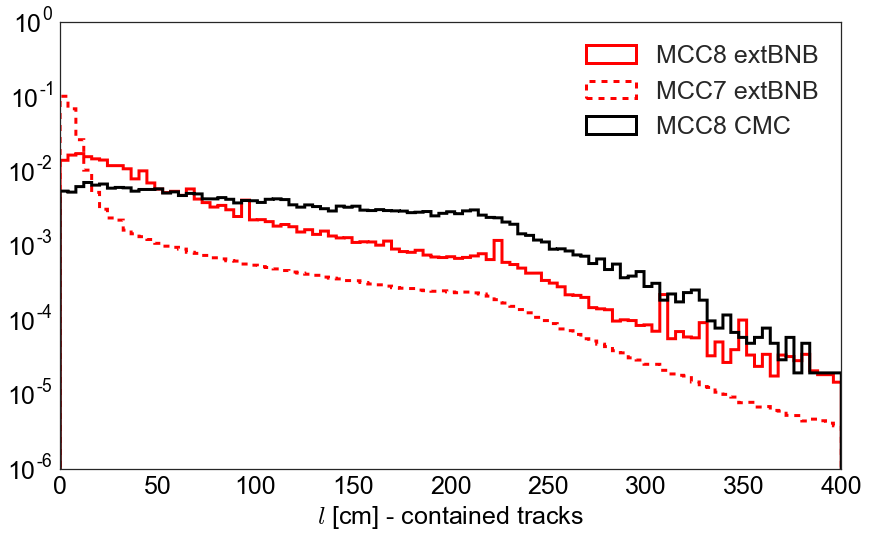

In [112]:
bins=np.linspace(0.0,400,100)
fig,ax=plt.subplots(figsize=(14,8))
for full_features,c,ls,name in zip(full_features_datasets,colors,linestyles,dataset_names):
    h,bins,_ = plt.hist( full_features['length'].astype(float) , bins=bins, histtype='step' , color=c , linewidth=3 , linestyle=ls, normed=1 , label=name)

set_axes(ax,x_label = '$l$ [cm] - contained tracks', fontsize=25)    
ax.legend(loc='best',fontsize=25)
# ax.set_xlim(0.01,1.05)
ax.set_yscale('log')
plt.subplots_adjust(hspace=0.2)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/lenght.pdf')

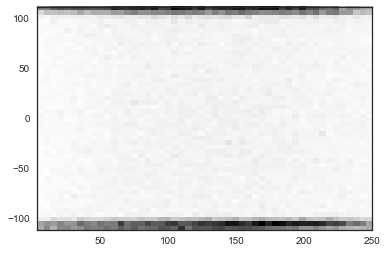

In [14]:
plt.hist2d(MCC8extBNB.endx.astype(float),MCC8extBNB.endy.astype(float),bins=(50,50));

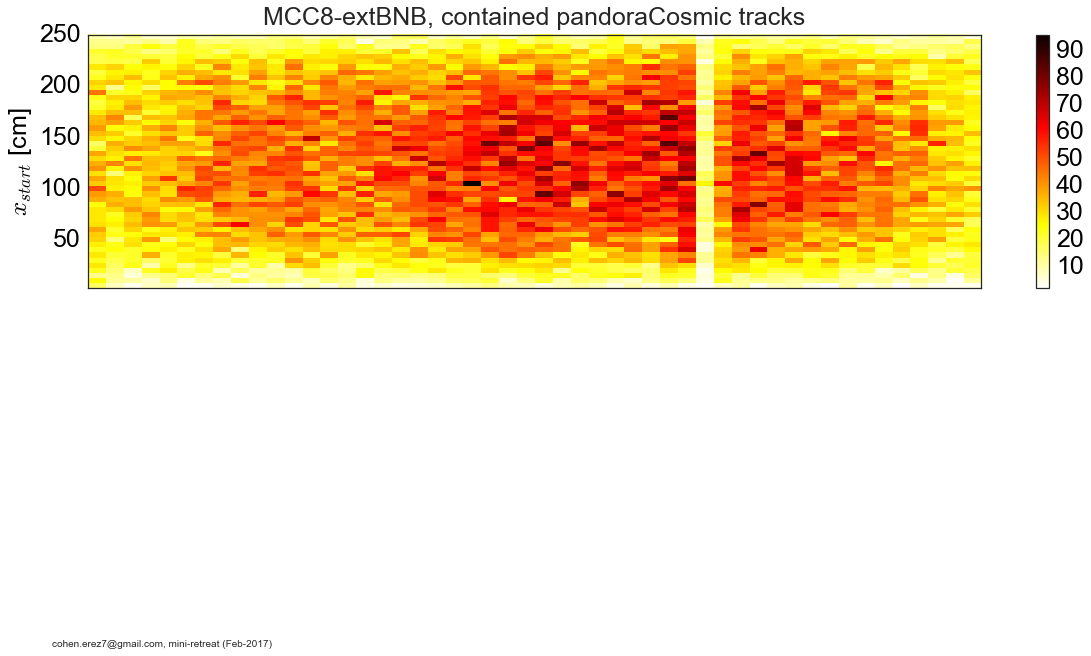

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
plot_2d_histogram(data=MCC8extBNB , varx='startz' , vary='startx' ,                      
                  x_label = '', y_label='$x_{start}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False                 
                  )
ax.xaxis.set_major_formatter( NullFormatter() )

# ax = fig.add_subplot(2,1,2)
# plot_2d_histogram(data=MCC8extBNB , varx='startz' , vary='starty' ,                      
#                   x_label = '$z_{start}$ [cm]', y_label='$y_{start}$ [cm]',
#                   binsx=50, binsy=50, ax=ax , do_save_fig=False,
#                   do_add_title=False)
# plt.subplots_adjust(hspace=0.05)
# plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_start_coordinates.pdf'%namestr(MCC8extBNB, globals()))

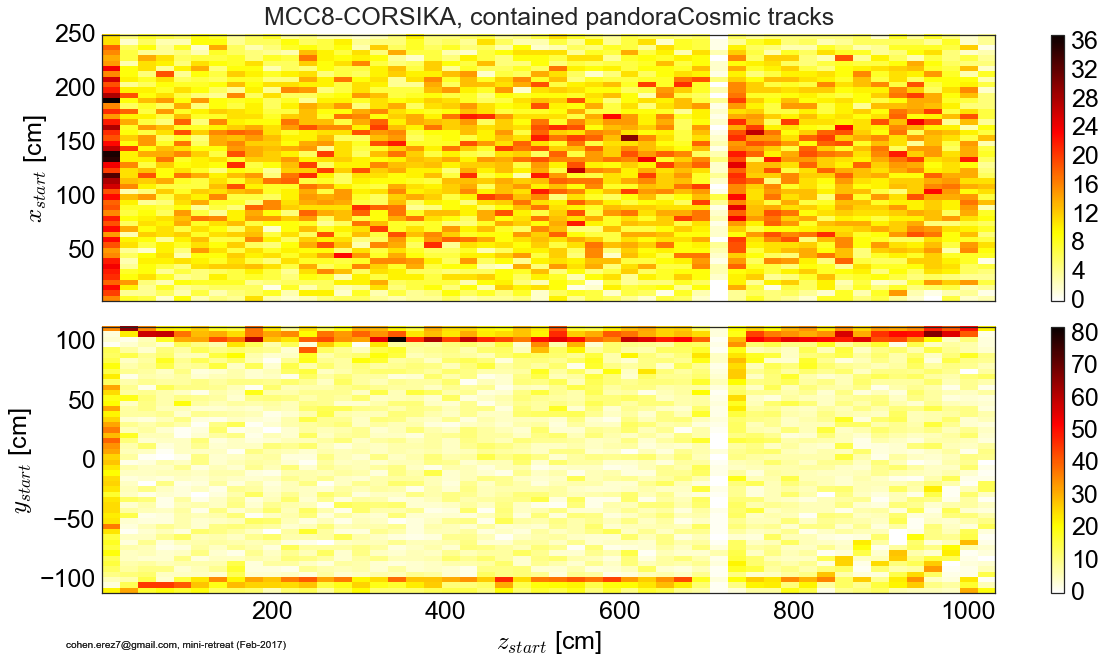

In [180]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
plot_2d_histogram(data=MCC8cmc , data_name = 'MCC8-CORSIKA, contained pandoraCosmic tracks',
                  varx='startz' , vary='startx' ,                      
                  x_label = '', y_label='$x_{start}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False                 
                  )
ax.xaxis.set_major_formatter( NullFormatter() )

ax = fig.add_subplot(2,1,2)
plot_2d_histogram(data=MCC8cmc , data_name = 'MCC8-CORSIKA, contained pandoraCosmic tracks',
                  varx='startz' , vary='starty' ,                      
                  x_label = '$z_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
plt.subplots_adjust(hspace=0.1)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_start_coordinates.pdf'%namestr(MCC8cmc, globals()))

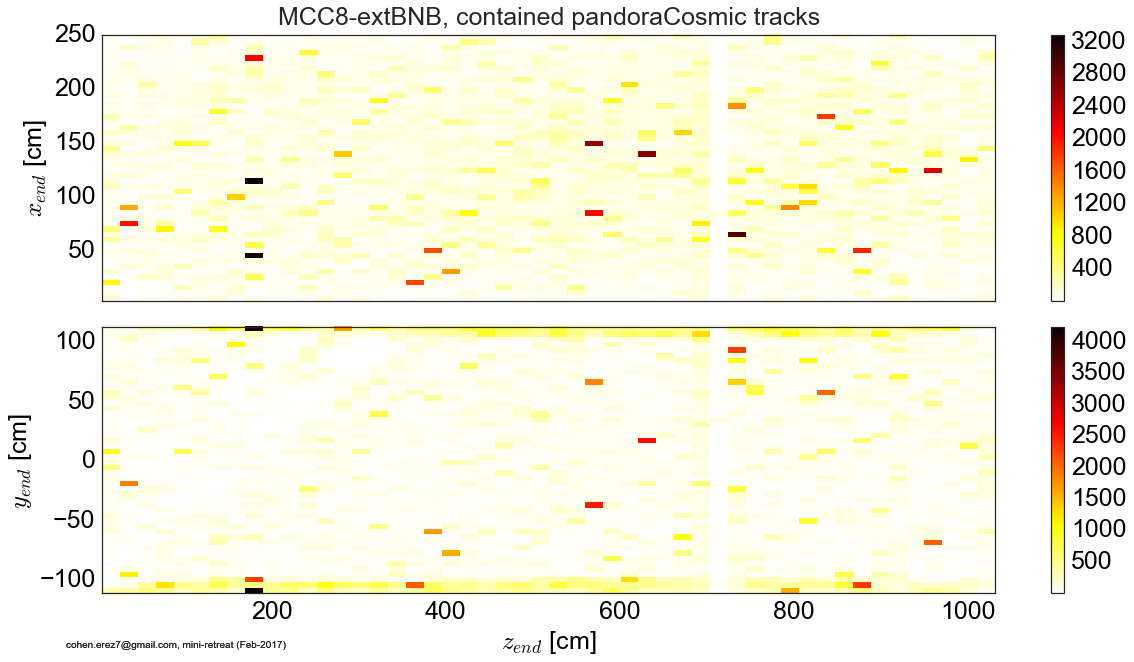

In [137]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
plot_2d_histogram(data=MCC8extBNB , varx='endz' , vary='endx' ,                      
                  x_label = '', y_label='$x_{end}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False                 
                  )
ax.xaxis.set_major_formatter( NullFormatter() )

ax = fig.add_subplot(2,1,2)
plot_2d_histogram(data=MCC8extBNB , varx='endz' , vary='endy' ,                      
                  x_label = '$z_{end}$ [cm]', y_label='$y_{end}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
plt.subplots_adjust(hspace=0.1)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_end_coordinates.png'%namestr(MCC8extBNB, globals()))

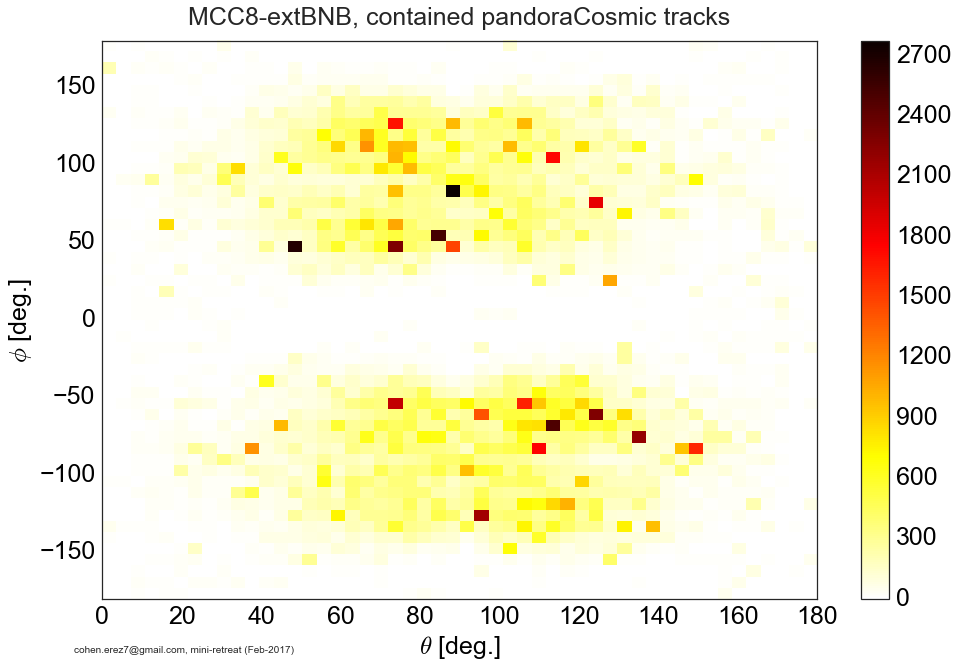

In [138]:
plot_2d_histogram(data=MCC8extBNB , varx='theta' , vary='phi' , mul_x=180./np.pi , mul_y=180./np.pi,
                  x_label = '$\\theta$ [deg.]', y_label='$\\phi$ [deg.]',
                  binsx=50, binsy=50,                   
                  )

In [178]:
# groups = MCC8extBNB.groupby('endz')
MCC8cmc

,run,subrun,event,length,startx,starty,startz,endx,endy,endz,theta,phi,distlenratio
0,1.0,885.0,44201.0,206.931,164.813,102.013,542.536,16.741,-40.490,518.789,1.704,-2.414,1.000
1,1.0,885.0,44201.0,143.192,147.667,-34.472,58.652,164.130,106.471,77.575,1.389,1.442,1.000
2,1.0,885.0,44201.0,62.377,225.342,56.749,442.676,210.304,101.345,401.800,2.266,1.872,0.999
3,1.0,885.0,44201.0,54.981,145.116,-56.290,55.419,137.997,-107.796,39.449,1.808,-1.703,0.989
4,1.0,885.0,44203.0,216.940,109.470,-86.769,783.845,162.406,98.722,882.582,1.086,1.304,0.999
5,1.0,885.0,44203.0,229.771,111.816,85.530,485.323,226.067,-110.511,449.814,1.686,-1.047,1.000
6,1.0,885.0,44203.0,33.327,36.748,27.778,248.662,55.304,0.626,254.010,1.409,-0.954,1.000
7,1.0,885.0,44203.0,22.014,109.371,-86.495,784.008,102.291,-103.771,772.408,2.105,-1.961,0.999
8,1.0,885.0,44204.0,199.763,164.219,76.360,204.247,100.679,-108.672,244.320,1.340,-1.898,1.000
9,1.0,885.0,44204.0,46.358,36.896,14.061,961.565,31.569,-29.018,948.386,1.635,-1.700,0.979


In [176]:
MCC8extBNB[(MCC8extBNB.theta>1.746) &(MCC8extBNB.theta<1.748)]

,run,subrun,event,length,startx,starty,startz,endx,endy,endz,theta,phi,distlenratio
8681,5996.0,50.0,2515.0,70.316,137.683,-30.064,1018.972,132.058,-98.976,1030.376,1.747,1.477,0.997
9309,5990.0,40.0,2021.0,23.268,69.367,-78.947,754.552,64.523,-98.038,744.378,1.747,-1.782,0.953
11655,5996.0,19.0,967.0,23.399,94.197,32.717,426.123,82.179,52.130,421.068,1.747,2.108,0.999
22392,6024.0,1.0,73.0,621.930,70.390,-79.747,819.446,60.691,105.316,800.192,1.747,1.568,0.300
23395,6024.0,78.0,3940.0,200.332,65.471,69.381,114.092,69.688,-110.135,79.762,1.747,-1.549,0.913
28646,5904.0,8.0,432.0,201.964,121.752,71.185,641.704,80.334,-110.307,570.256,1.747,-1.723,0.987
35741,5886.0,16.0,821.0,89.375,139.210,40.232,948.434,192.685,-29.398,931.819,1.747,-0.912,1.000
38296,5891.0,76.0,3837.0,48.723,155.616,97.083,431.520,120.204,64.142,426.073,1.747,-2.465,0.999
38308,5891.0,76.0,3839.0,48.723,155.616,97.083,431.520,120.204,64.142,426.073,1.747,-2.465,0.999
38855,5886.0,0.0,45.0,22.042,104.458,-36.032,780.768,88.780,-21.121,776.611,1.747,2.323,1.000


In [188]:
print len(MCC8extBNB)
MCC8extBNB=MCC8extBNB.drop_duplicates('theta')
print len(MCC8extBNB)

TypeError: object of type 'NoneType' has no len()

ValueError: setting an array element with a sequence.

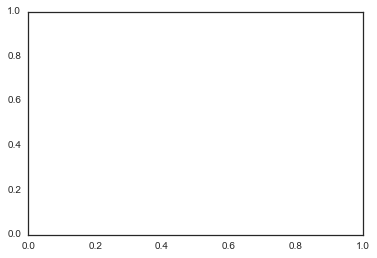

In [162]:
plt.hist(groups.endx)